<a href="https://colab.research.google.com/github/lucianoigit/Data_scientist/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
"""
author: Luciano Iriarte
Topic: Naive Bayes
Exercise: prediction of possibility of rental or purchase for a person according to their income
"""

'\nauthor: Luciano Iriarte\nTopic: Naive Bayes\nExercise: prediction of possibility of rental or purchase for a person according to their income\n'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Used to graph
import numpy as np
from sklearn.preprocessing import StandardScaler # Convert variable to a Gaussian distribution
from sklearn.model_selection import train_test_split # Separate dataset into training and testing
from sklearn.pipeline import make_pipeline # It serves to make a pipeline and have everything in a single calculation flow
from sklearn.feature_selection import SelectKBest# It serves to see the importance of the variables
from sklearn.metrics import confusion_matrix# used to view ranking results
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB # We use a Gaussian model
from google.colab import files
import warnings

warnings.filterwarnings("ignore")



In [4]:
files.upload()

Saving 01 comprar_alquilar Anahí Romo 09-11-22.csv to 01 comprar_alquilar Anahí Romo 09-11-22.csv


{'01 comprar_alquilar Anahí Romo 09-11-22.csv': b'ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar\r\n6000,1000,0,600,50000,400000,0,2,2,1\r\n6745,944,123,429,43240,636897,1,3,6,0\r\n6455,1033,98,795,57463,321779,2,1,8,1\r\n7098,1278,15,254,54506,660933,0,0,3,0\r\n6167,863,223,520,41512,348932,0,0,3,1\r\n5692,911,11,325,50875,360863,1,4,5,1\r\n6830,1298,345,309,46761,429812,1,1,5,1\r\n6470,1035,39,782,57439,606291,0,0,1,0\r\n6251,1250,209,571,50503,291010,0,0,3,1\r\n6987,1258,252,245,40611,324098,2,1,7,1\r\n7273,1455,303,201,39340,577972,0,0,0,0\r\n5058,1012,74,463,51836,427334,2,0,2,0\r\n5663,793,121,225,67971,524971,2,3,6,1\r\n6139,921,210,387,65438,333239,1,3,8,1\r\n7567,1059,341,339,42462,641963,2,2,5,0\r\n5749,690,291,698,50257,305122,2,0,4,1\r\n5685,910,182,271,66947,365809,1,2,8,1\r\n6722,807,52,779,66020,593711,2,2,7,0\r\n7705,1387,348,366,65410,597411,0,0,2,0\r\n6038,966,53,270,69636,286581,1,1,7,1\r\n6840,889,127,263,50080,45

In [5]:
#We load the data into a dataframe
casas=pd.read_csv("01 comprar_alquilar Anahí Romo 09-11-22.csv")
casas.shape # We look at how the dataframe is

(202, 10)

In [6]:
print(casas.head(10)) #We look at the first 10 lines
casas.columns

   ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda  \
0      6000            1000           0           600    50000    400000   
1      6745             944         123           429    43240    636897   
2      6455            1033          98           795    57463    321779   
3      7098            1278          15           254    54506    660933   
4      6167             863         223           520    41512    348932   
5      5692             911          11           325    50875    360863   
6      6830            1298         345           309    46761    429812   
7      6470            1035          39           782    57439    606291   
8      6251            1250         209           571    50503    291010   
9      6987            1258         252           245    40611    324098   

   estado_civil  hijos  trabajo  comprar  
0             0      2        2        1  
1             1      3        6        0  
2             2      1        8   

Index(['ingresos', 'gastos_comunes', 'pago_coche', 'gastos_otros', 'ahorros',
       'vivienda', 'estado_civil', 'hijos', 'trabajo', 'comprar'],
      dtype='object')

comprar
0    135
1     67
dtype: int64


'podemos ver un claro desvalance'

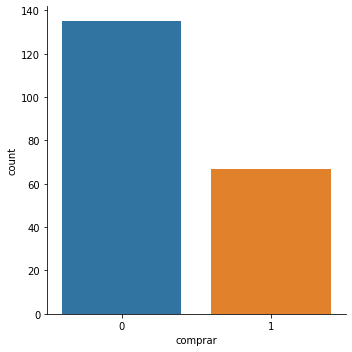

In [7]:
print(casas.groupby("comprar").size()) #We want to see how many "buys" there are
sns.catplot("comprar",data=casas,kind="count")
"podemos ver un claro desvalance"

In [8]:
casas.isnull().sum()#We look for null values, if not it is an ideal dataframe

ingresos          0
gastos_comunes    0
pago_coche        0
gastos_otros      0
ahorros           0
vivienda          0
estado_civil      0
hijos             0
trabajo           0
comprar           0
dtype: int64

'The characteristics have no normal distribution, with the possible exception of gastos_comunes'

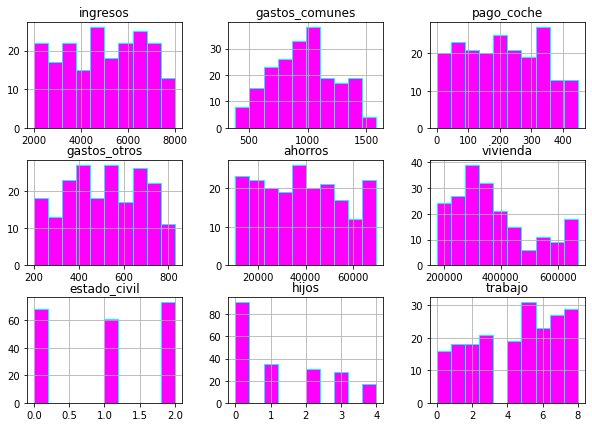

In [9]:
#We do an explosive analysis
#We see how the characteristics are distributed without the "buy" column.
#plt.figure(figsize=(20,20))
columnas=["ingresos","gastos_comunes","pago_coche","gastos_otros","ahorros","vivienda","estado_civil","hijos","trabajo"]
casas[columnas].hist(figsize=(10,7),color="magenta",edgecolor="cyan")# We assemble the histogram



"The scales are very different from each other, so we must standardize they or the algorithm will focus on the highest values"
"We realize they are three categorical characteristics: marital status, children and work; which we will no take in consideration."
"Also the characteristics don't have a normal distribution, with the possible exception of gastos_comunes"#To use Gauss they have to have normal distribution
 

In [10]:
#We normalize features and remove non-categoricals
#Grouping expenses
casas["gastos"]=(casas["gastos_comunes"]+casas["gastos_otros"]+casas["pago_coche"])
#We combine the columns that we don't use renaming as "gastos".
comprarOno=casas.drop(["gastos_comunes","gastos_otros","pago_coche"],axis=1)
comprarOno.head(10)

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos
0,6000,50000,400000,0,2,2,1,1600
1,6745,43240,636897,1,3,6,0,1496
2,6455,57463,321779,2,1,8,1,1926
3,7098,54506,660933,0,0,3,0,1547
4,6167,41512,348932,0,0,3,1,1606
5,5692,50875,360863,1,4,5,1,1247
6,6830,46761,429812,1,1,5,1,1952
7,6470,57439,606291,0,0,1,0,1856
8,6251,50503,291010,0,0,3,1,2030
9,6987,40611,324098,2,1,7,1,1755


In [11]:
#We show the statistical summary of the transformed DF
comprarOno.describe().T

,count,mean,std,min,25%,50%,75%,max
ingresos,202.0,4958.995050,1682.862556,2008.0,3513.75,4947.5,6374.50,7984.0
ahorros,202.0,38749.668317,17365.231870,10319.0,24964.25,38523.0,52150.75,69934.0
vivienda,202.0,373349.638614,136371.525622,176553.0,274810.00,340783.5,444482.00,669540.0
estado_civil,202.0,1.024752,0.837184,0.0,0.00,1.0,2.00,2.0
hijos,202.0,1.232673,1.367833,0.0,0.00,1.0,2.00,4.0
trabajo,202.0,4.490099,2.535794,0.0,2.00,5.0,7.00,8.0
comprar,202.0,0.331683,0.471988,0.0,0.00,0.0,1.00,1.0
gastos,202.0,1698.752475,324.838005,1007.0,1430.50,1669.5,1928.00,2543.0


In [12]:
#Let's select the most relevant features from the original dataframe using just 4 columns
X=comprarOno.drop(["comprar"],axis=1)# I separate between predictors and what I want to predict
y=comprarOno["comprar"]#
mejor=SelectKBest(k=4)
mejorX=mejor.fit_transform(X,y)
print(mejorX.shape)
selec=mejor.get_support(indices=True)
print(X.columns[selec])

#The suggestion of importance doesn't seem reasonable



(202, 4)
Index(['ingresos', 'ahorros', 'hijos', 'trabajo'], dtype='object')


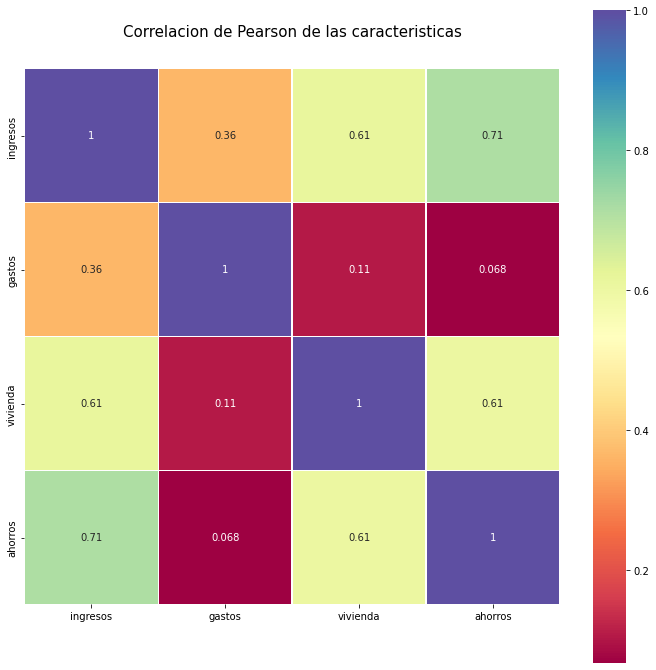

In [13]:
#Will the characteristics be correlated?
#I will collect the features I consider most relevant, which are:
usadas=["ingresos","gastos","vivienda","ahorros"]
colormap=plt.cm.Spectral #color map
plt.figure(figsize=(12,12))
plt.title("Correlacion de Pearson de las caracteristicas",y=1.05,size=15)
sns.heatmap(comprarOno[usadas].astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,linecolor="white",annot=True)
#Using Pearson's correlation applying corr over "usadas" gives an idea but is not always accurate.

<function matplotlib.pyplot.show(*args, **kw)>

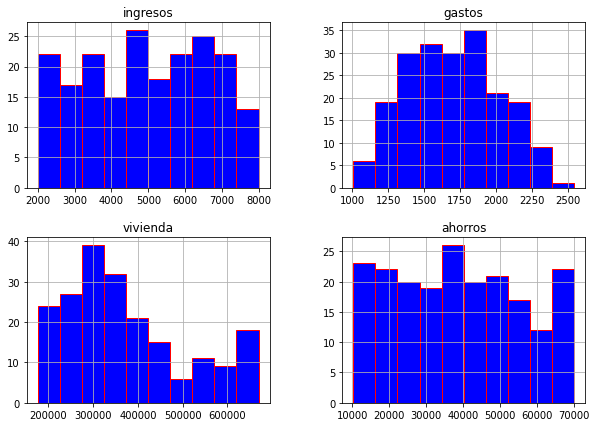

In [14]:
#We show a histogram of the features we are going to use
comprarOno[usadas].hist(color="b",edgecolor="red",figsize=(10,7))
plt.show
#We see that neither savings nor income have a normal distribution


In [15]:
#After analyzing and preparing the dataset, we divide it in "train" and "test" using a 80/20 criteria
#To use bayes we will focus only in the "usadas" columns which are supposed to be the most significant.
X_train,X_test,y_train,y_test=train_test_split(comprarOno[usadas],comprarOno["comprar"],test_size=0.2,random_state=16,stratify=comprarOno["comprar"])
#What does Stratify do? It sets the original dataset relationships to avoid the balance problem and train knowing the class distribution.

In [16]:
#Now we build the pipeline which in first place standardizes the features and then trains the NB model. Then, we create the model using naïve Gaussian Bayes.
#We force characteristics to have a normal distribution.
bayes=make_pipeline(StandardScaler(),GaussianNB())
#We train it.
bayes.fit(X_train,y_train)
y_pred=bayes.predict(X_test)
#We want to know how the algorithm predices in train and test.

print(f"prediccion en el set de entrenamiento:{bayes.score(X_train,y_train)}")
print(f"prediccion en el set de test:{bayes.score(X_test,y_test)}")

prediccion en el set de entrenamiento:0.8757763975155279
prediccion en el set de test:0.8292682926829268


[[24  3]
 [ 4 10]]


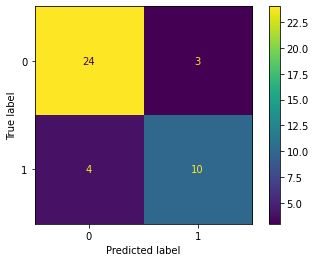

In [17]:
#We use the confusion matrix.
conf=confusion_matrix(y_test,y_pred)
#Showing as list list.
print(conf)
#Showing graphically.
ConfusionMatrixDisplay(conf).plot()

#On the main diagonal we have the successes. The other diagonal (purple) has the errors.

In [18]:
# We try to do some predictions with the following entries ["igresos","gastos","vivienda","ahorros"]
#1) 5k "ingresos", 2k "gastos", 5k "ahorros" and 200k "vivienda"
#2) 34k "ingresos", 6k "gastos", 34k "ahorros" and 320k "vivienda"

consulta1=np.asarray([5000,2000,200000,5000])
consulta2=np.asarray([34000,6000,320000,34000])
print("resultado sugerido 0 = alquilar, 1 = comprar")
print(bayes.predict(consulta1.reshape(1,-1)))
print(bayes.predict(consulta2.reshape(1,-1)))
# is a real example named differently
consulta3=np.array([[3900,800,88000,3900],[3900,800,42000,2000],[50000000,800,23500,500000]])
print(bayes.predict(consulta3))
# another one
consulta4=np.array([[5000,2200,288000,50000],[15000,2500,42000,15000],[1500,2500,23500,15000]])
print(bayes.predict(consulta4))

# As we see we must ask for predictions for data that you know
"Query 4 was modified in the first array value to be in the training range, unlike the other entries that are not in the training range"



resultado sugerido 0 = alquilar     1 = comprar
[0]
[0]
[0 0 0]
[1 0 0]


'Query 4 was modified with value within the range of the trainee, unlike the other entries that are not above the training range'